In [4]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
df = pd.read_csv('data.csv')
df.describe()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
count,10.00000,10.000000,10.000000,10.000000
mean,1980.50000,23.800000,691.900000,5715.800000
std,3.02765,4.709329,252.389228,1117.767795
min,1976.00000,16.000000,223.000000,3863.000000
25%,1978.25000,21.250000,570.500000,5140.500000
50%,1980.50000,23.000000,759.000000,5845.500000
75%,1982.75000,25.750000,812.750000,6175.500000
max,1985.00000,31.000000,1066.000000,7433.000000


In [8]:
import cmdstanpy

# compile the model
model = cmdstanpy.CmdStanModel(stan_file='prior.stan')

# create data dictionary
data = {
    'N': len(df),
    'miles_flown': np.log(df['Miles flown [100 mln miles]'].values),
    'alpha' : -1,
    'theta' : 6e-4
}

sim1=model.sample(
    data=data,
    iter_sampling=1000,
    iter_warmup=0,
    chains=1,
    fixed_param=True,
    seed=24072000,
    refresh=1000
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


TypeError: cannot do positional indexing on Index with these indexers [y[1]] of type str

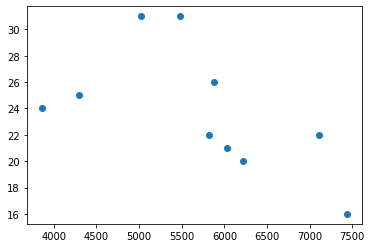

In [9]:
plt.scatter(df["Miles flown [100 mln miles]"].values, df["Fatal accidents"].values)
plt.scatter(df["Miles flown [100 mln miles]"].values, sim1.draws_pd().iloc[:,"y[1]":"y[10]"])